In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

### Logistic Regression

Is a discriminative model that assigns discrete classes to a set of observations (decision boundary between the classes)
 - No distribution assumption on the data points as opposed to Naive Bayes

As this is a binary classifier, Logistic Regression uses a link function to transform the features and to bound the output between [0, 1]
 - Sigmoid function: $f(x) = \frac{1}{1+e^{-wx+b}}$

Thus, our logistic model looks like the following: $f_{w,b}(x) = \frac{1}{1+e^{-wx+b}}$

What happens when $-wx+b$ is largely negative or largely positive?
 - When the **denominator is largely positive**, then the $P(y = 1 | x)$ is **close to 0**
 - When the **denominator is largely negative**, or is one, then $P(y = 1 | x)$ is **closer to one**


We do not attempt to model the data's distribution $P(X | Y)$, rather we model $P(Y | X)$ directly given the parameters $w, b$. 

_Goal_: Find $w, b$ that maximize the likelihood (log-likelihood) of producing our data using Gradient Descent

Log-likelihood = $\sum_{i=1}^Ny_iw^Tx_i-log(1 + e^{w^Tx_i})$

In [74]:
fish = pd.read_csv('/Users/gabestechschulte/Downloads/Fish.csv')
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [75]:
fish.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [76]:
fish_binary = fish[(fish.Species == 'Bream') | (fish.Species == 'Roach')]

In [77]:
X = fish_binary[['Weight','Height']].values
X.shape

(55, 2)

In [78]:
X[:, 0].reshape(-1, 1).shape

(55, 1)

In [79]:
y = fish_binary.Species.apply(lambda x: 1 if (x == 'Bream') else 0).values

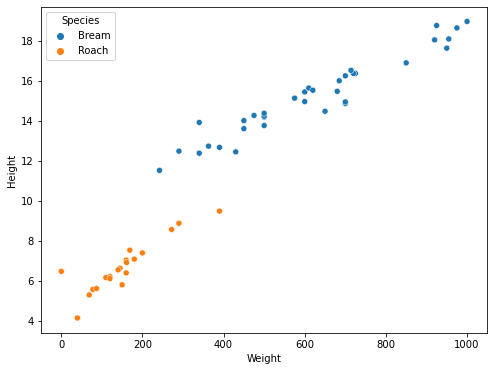

In [80]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = fish_binary.Weight, y = fish_binary.Height, hue = fish_binary.Species)
plt.show()

In [81]:
class LogisticRegression():
    
    def __init__(self, X, y, intercept=False, lr=0.01, iterations=100):
        
        #if intercept == True:
        #    self.intercept = np.ones((X.shape[0], 1))
            
        
        self.lr = lr
        self.iterations = iterations
        self.X = X
        self.y = y
        
    def sigmoid(self, scores):
        return 1 / (1 + np.exp(-scores))
    
    def log_likelihood(self, X, y, w):
        scores = np.dot(X, w)
        ll = np.sum(y * scores - np.log(1 + np.exp(scores)))
        return ll
    
    def training(self):
        
        # Initialize weights; X.shape[1] grabs 2 element of shape list to determine how many features are used in the model
        w = np.zeros(self.X.shape[1])
        
        for train in range(self.iterations):
            # Feature times its weight parameter
            scores = np.dot(X, w)
            # "Push" the scores through the denominator of our sigmoid function
            predictions = self.sigmoid(scores)
            # Compute the error between our predictions vs the actual 
            error = y - predictions
            # Gradient Descent to update weights based on our error (minimize error)
            gradient = np.dot(X.T, error)
            # Update weights
            w += self.lr * gradient
            
            #if train % 500:
            #    print(log_likelihood(X, y, w))
            
        return w

In [82]:
# Too large or small of a step size does not lead to convergence
lr = LogisticRegression(X=X, y=y, lr=1e-5, iterations=5000)
w = lr.training()

In [83]:
w.shape

(2,)

In [89]:
w

array([ 0.06824285, -0.98166139])

In [84]:
scores = np.dot(X, w)
preds = 1 / 1 + np.exp(-scores)

print('Accuracy of model: {}'.format((preds == y).sum() / len(preds)))

Accuracy of model: 0.12727272727272726


In [85]:
preds

array([  1.0054834 ,   1.00053177,   1.00001586,   1.00000466,
         1.00000004,   1.00000003,   1.        ,   1.0000007 ,
         1.00000004,   1.        ,   1.00000001,   1.        ,
         1.        ,   1.00007157,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   1.        ,   1.        ,   4.82451721,
         2.63620591,   2.16230973,   1.65473262,   1.12404207,
       577.19944671,   1.23407347,   1.1122895 ,   1.01069078,
         1.03394651,   1.01805309,   1.04397577,   1.00969425,
         1.0159737 ,   1.01501635,   1.0016826 ,   1.00485828,
         1.00001547,   1.00003903,   1.00000003])

In [86]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Scikit Learn Comparison

In [96]:
sk_lr = LogisticRegression(intercept=False, C=1e15)
sk_lr.fit(X, y)

TypeError: __init__() got an unexpected keyword argument 'C'

In [ ]:
sk_lr.coef_, sk_lr.score(X, y)